Fold 1: AUROC: 0.9008, AUPRC: 0.8998
Fold 2: AUROC: 0.8379, AUPRC: 0.8863
Fold 3: AUROC: 0.8342, AUPRC: 0.8879
Fold 4: AUROC: 0.8243, AUPRC: 0.6413
Fold 5: AUROC: 0.8293, AUPRC: 0.8830
Fold 6: AUROC: 0.8256, AUPRC: 0.8450
Fold 7: AUROC: 0.8592, AUPRC: 0.9097
Fold 8: AUROC: 0.8988, AUPRC: 0.9406
Fold 9: AUROC: 0.9500, AUPRC: 0.9479
Fold 10: AUROC: 0.8475, AUPRC: 0.8636
Fold 11: AUROC: 0.9081, AUPRC: 0.8626
Fold 12: AUROC: 0.8499, AUPRC: 0.9055
Fold 13: AUROC: 0.9282, AUPRC: 0.8329
Fold 14: AUROC: 0.9228, AUPRC: 0.9409
Fold 15: AUROC: 0.9517, AUPRC: 0.9477
Fold 16: AUROC: 0.9592, AUPRC: 0.9629
Fold 17: AUROC: 0.8972, AUPRC: 0.9458
Fold 18: AUROC: 0.8540, AUPRC: 0.6096
Fold 19: AUROC: 0.8708, AUPRC: 0.9225
Fold 20: AUROC: 0.9128, AUPRC: 0.9720
Fold 21: AUROC: 0.9508, AUPRC: 0.9114
Fold 22: AUROC: 0.8897, AUPRC: 0.7842
Average AUROC: 0.8865
Average AUPRC: 0.8774
[0.69295308 0.32738965 2.59075555 0.79819728 0.4301569 ]


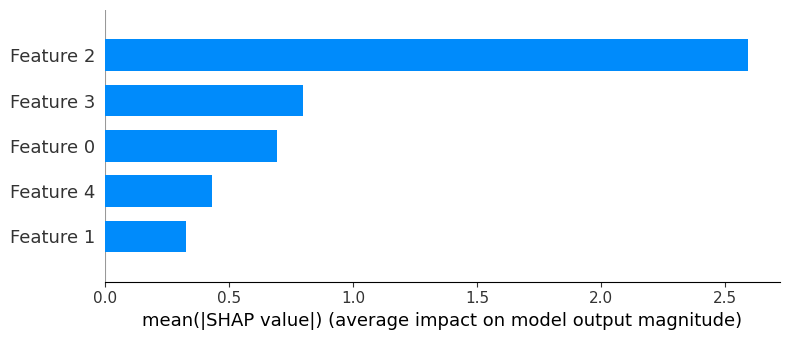

In [5]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import torch
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

lable_path = ' ' ###found in 1-label_marker
feature_path = ' ' ###found in 2-feature_marker
node_features = []
node_tags = []
for ch in range(1,23):
    lable = lable_path + '/chr' +str(ch)+'_label.txt'
    feature = feature_path + '/chr' +str(ch) + '_feature.txt'
    l = pd.read_csv(lable,sep = '\t',header = None).values
    f = pd.read_csv(feature,sep = ' ',header = None).values
    node_features.append(f)
    node_tags.append(l.flatten())


import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt


auroc_scores = []
auprc_scores = []

# 23折交叉验证
for i in range(22):
    
    X_test = np.array(node_features[i])[:,:] ###CTCF,DNase,H3K27ac,H3K4me3,HiC
    y_test = np.array(node_tags[i].reshape(-1))

    
    X_train = np.vstack([node_features[j][:,:] for j in range(22) if j != i])
    y_train = np.concatenate([node_tags[j].reshape(-1) for j in range(22) if j != i])


    model = HistGradientBoostingClassifier()
    
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]


    auroc = roc_auc_score(y_test, y_pred_proba)
    auprc = average_precision_score(y_test, y_pred_proba)
    auroc_scores.append(auroc)
    auprc_scores.append(auprc)

    print(f"Fold {i+1}: AUROC: {auroc:.4f}, AUPRC: {auprc:.4f}")


print(f"Average AUROC: {np.mean(auroc_scores):.4f}")
print(f"Average AUPRC: {np.mean(auprc_scores):.4f}")


import shap


explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)


feature_importance = np.abs(shap_values).mean(axis=0)
print(feature_importance)


shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)